In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# load PCA Results
# transform results into real prices
# pca_results = pd.read_csv('PCA_forecasting_schemes_comparison.csv')
real_prices = pd.read_csv('data/real_house_prices.csv', index_col=0, parse_dates=True).squeeze()
log_diff_real_prices = np.log(real_prices).diff().dropna()


ar_logdiff = pd.read_csv("ar3_forecast_logdiff.csv").set_index(pd.to_datetime(pd.read_csv("ar3_forecast_logdiff.csv")['Unnamed: 0']))

pca_logdiff = pd.read_csv("PCA_forecasting_schemes_comparison.csv").set_index(pd.to_datetime(pd.read_csv("PCA_forecasting_schemes_comparison.csv")['Unnamed: 0']))
pca_one_step = pca_logdiff['onestep']
# drop first 3 obs
pca_one_step = pca_one_step[-3:]
ols_logdiff = pd.read_csv("ols_one_step_ahead_predictions.csv", index_col=0)

from sklearn.model_selection import train_test_split
# skip first 414 observations for training/testing split
log_diff_real_prices = log_diff_real_prices[-414:]
y_train, y_test = train_test_split(log_diff_real_prices, test_size=0.2, random_state=42)


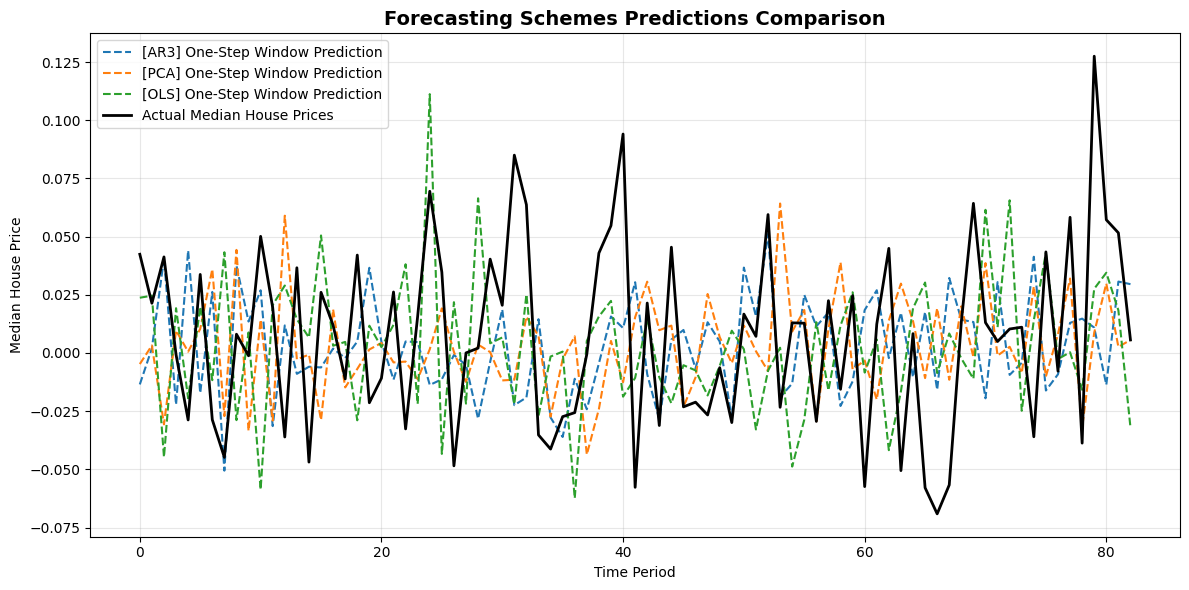

In [12]:

# plot predictions for each scheme and actual prices
plt.figure(figsize=(12, 6))
time_index = range(len(ar_logdiff['Rolling']))
# plt.plot(time_index, 
# 		 ar_logdiff['Rolling'],
# 		 label='[AR3] Rolling Window Prediction', linestyle='--')
# plt.plot(time_index, 
# 		 ar_logdiff['Expanding'],
# 		 label='[AR3] Expanding Window Prediction', linestyle='--')
plt.plot(time_index, 
		 ar_logdiff['One-Step'],
		 label='[AR3] One-Step Window Prediction', linestyle='--')
# plt.plot(time_index, 
# 		 pca_logdiff['rolling'],
# 		 label='[PCA] Rolling Window Prediction', linestyle='--')
# plt.plot(time_index, 
# 		 pca_logdiff['expanding'],
# 		 label='[PCA] Expanding Window Prediction', linestyle='--')
plt.plot(time_index, 
		 pca_logdiff['onestep'],
		 label='[PCA] One-Step Window Prediction', linestyle='--')
plt.plot(time_index, 
		 ols_logdiff['Predicted'],
		 label='[OLS] One-Step Window Prediction', linestyle='--')
plt.plot(time_index, 
		 y_test.values,
		 label='Actual Median House Prices', color='black', linewidth=2)


plt.xlabel('Time Period')
plt.ylabel('Median House Price')
plt.title('Forecasting Schemes Predictions Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('forecasting_schemes_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

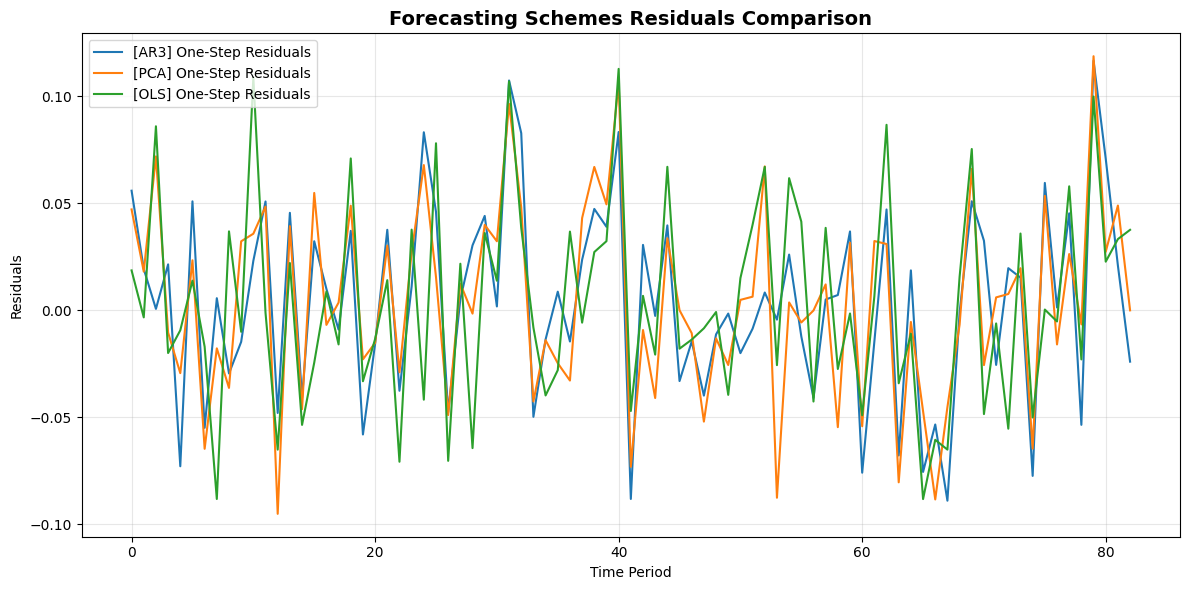

In [13]:
# plot the residuals for each scheme
plt.figure(figsize=(12, 6))
plt.plot(time_index, 
         y_test.values - ar_logdiff['One-Step'], label='[AR3] One-Step Residuals')
plt.plot(time_index, 
         y_test.values - pca_logdiff['onestep'], label='[PCA] One-Step Residuals')
plt.plot(time_index, 
         y_test.values - ols_logdiff['Predicted'], label='[OLS] One-Step Residuals')
plt.xlabel('Time Period')
plt.ylabel('Residuals')
plt.title('Forecasting Schemes Residuals Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('forecasting_schemes_residuals_comparison.png', dpi=300, bbox_inches='tight')
plt.show()  